# Gerekli bağlantımızı yapalım

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


# Gerekli kütüphaneleri import edelim

In [ ]:
from keras.applications import ResNet50
from keras.preprocessing.image import img_to_array
from keras.applications import imagenet_utils
from PIL import Image
import numpy as np
from io import BytesIO
import os
import requests

Using TensorFlow backend.


# ResNet50 Modelinin ağırlıklarını alalım. Resnet bir nesne tanıma modelidir.

In [ ]:
model = ResNet50(weights="imagenet")

102858752/102853048 [==============================] - 3s 0us/step


#Bu uygulamada resmi direkt internette alacağız.Şunu yapacağız.(ImageURL içine istediğiniz fotonun linkini kopyalayın)

In [ ]:
#@title Default title text { vertical-output: true }
ImageURL = "https://www.trthaber.com/resimler/898000/898717.jpg" #@param {type:"string"}

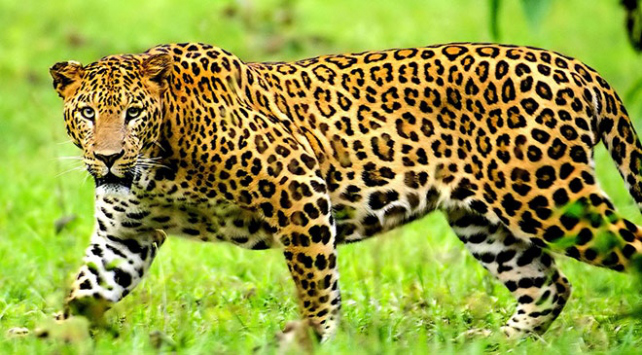

In [14]:
response = requests.get(ImageURL)
image = Image.open(BytesIO(response.content))
image

# Aldığımız görüntüyü bize uygun şekle sokmak için bir fonksiyon yazalım

In [ ]:
def prepare_image(image, target):
	# giriş görüntüsünü yeniden boyutlandırma ve ön işlemerin yapılması
	image = image.resize(target)
	image = img_to_array(image)
	image = np.expand_dims(image, axis=0)
	image = imagenet_utils.preprocess_input(image)

	# işlenmiş görüntüyü alma
	return image

#Şimdi temel işlemler ve sonunda sınıflandırma işlemini yapalım

In [ ]:
data = {"success": False}

pre_image = prepare_image(image, target=(224, 224)) # 224 x 224 boyutlu hale getir

preds = model.predict(pre_image) # Kesirim modeline ön işlemden geçmiş görüntüyü uygula

results = imagenet_utils.decode_predictions(preds) #kestirim
data["predictions"] = []


for (imagenetID, label, prob) in results[0]: # ImageNet veri kümseinden etiket, olasılık ve kestrim sonucunu al
  r = {"label": label, "probability": float(prob)}
  data["predictions"].append(r)
  
data["success"] = True

print(data)

40960/35363 [==================================] - 0s 0us/step
{'success': True, 'predictions': [{'label': 'leopard', 'probability': 0.8904556632041931}, {'label': 'jaguar', 'probability': 0.10618619620800018}, {'label': 'cheetah', 'probability': 0.0033208432141691446}, {'label': 'tiger_cat', 'probability': 1.5919575162115507e-05}, {'label': 'snow_leopard', 'probability': 9.695239896245766e-06}]}


# Daha güzel bir sonuç kısmı yapalım

In [13]:
print("Sınıflandırma tahmini en yüksek olan {0} oranıyla {1}'dır.".format(data["predictions"][0]["probability"],data["predictions"][0]["label"])) 
# En yüksek olasılıklı sonucu ekrana yazdır

Sınıflandırma tahmini en yüksek olan 0.8904556632041931 oranıyla leopard'dır.
